In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import ch
ch.set_ch()
import numpy as np
import sklearn as sk
from sklearn.preprocessing import *
from sklearn.metrics.pairwise import cosine_similarity
from sklearn import metrics
import time

In [6]:
data = pd.read_excel('data1.xls')

In [7]:
data.head()

,年龄,地区,行业,性别,商机渠道,是否老用户,成单时间间隔,备注条数,电话跟进次数,电话呼叫总时长,是否成单
0,36,成都,信息产业,2,用户自填单,0,25,6,7,3116,0
1,31,重庆,信息产业,1,网聊,1,12,5,7,5742,1
2,23,重庆,环保绿化,2,爬虫获取,0,2,9,1,6548,0
3,48,武汉,体育,2,转介绍,1,9,2,9,4246,0
4,38,上海,办公文教,2,用户自填单,0,3,4,6,211,0


### 将离散标签转换为独热编码

In [8]:
def onehot(pd,label_list):
    for label in label_list:
        for i in pd[label].value_counts().keys():
            pd[label+i]=pd[label].apply(lambda x :1 if x == i else 0)
    pd.drop(label_list,axis=1,inplace=True)
    return pd

In [9]:
data = onehot(data,['地区','行业','商机渠道'])

In [10]:
data.head()

,年龄,性别,是否老用户,成单时间间隔,备注条数,电话跟进次数,电话呼叫总时长,是否成单,西安,成都,...,信息产业,服装纺织,餐饮,环保绿化,爬虫获取,用户自填单,网聊,新媒体,地铁广告,转介绍
0,36,2,0,25,6,7,3116,0,0,1,...,1,0,0,0,0,1,0,0,0,0
1,31,1,1,12,5,7,5742,1,0,0,...,1,0,0,0,0,0,1,0,0,0
2,23,2,0,2,9,1,6548,0,0,0,...,0,0,0,1,1,0,0,0,0,0
3,48,2,1,9,2,9,4246,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,38,2,0,3,4,6,211,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [11]:
# for i in data['地区'].value_counts().keys():
#     data[i] = data['地区'].apply(lambda x: 1 if x == i else 0)
# for i in data['行业'].value_counts().keys():
#     data[i] = data['行业'].apply(lambda x: 1 if x == i else 0)
# for i in data['商机渠道'].value_counts().keys():
#     data[i] = data['商机渠道'].apply(lambda x: 1 if x == i else 0)

# data.drop('地区',axis = 1, inplace = True)
# data.drop('行业',axis = 1, inplace = True)
# data.drop('商机渠道',axis = 1, inplace = True)

### 打乱数据排列

In [12]:
train_test_data = data.sample(frac=1).reset_index(drop=True)

In [13]:
train_test_data.head()

,年龄,性别,是否老用户,成单时间间隔,备注条数,电话跟进次数,电话呼叫总时长,是否成单,西安,成都,...,信息产业,服装纺织,餐饮,环保绿化,爬虫获取,用户自填单,网聊,新媒体,地铁广告,转介绍
0,28,1,1,13,6,1,92,0,0,0,...,0,1,0,0,0,1,0,0,0,0
1,33,1,1,17,1,8,1942,1,0,1,...,0,0,0,0,0,0,1,0,0,0
2,40,1,1,18,0,9,5521,0,0,0,...,0,1,0,0,0,1,0,0,0,0
3,41,2,0,20,6,4,1856,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,44,2,1,24,8,7,1002,0,0,1,...,0,1,0,0,0,0,0,1,0,0


### 提取标签和训练数据

In [14]:
label = train_test_data['是否成单']
train_test_data.drop('是否成单',axis=1,inplace=True)

### 对数字分布较大的特征数据进行归一化操作

In [15]:
X_scaler = StandardScaler()
train_test_data['new_call'] = X_scaler.fit_transform(train_test_data['电话呼叫总时长'].values.reshape(-1,1))
train_test_data['new_call_num'] = X_scaler.fit_transform(train_test_data['电话跟进次数'].values.reshape(-1,1))
train_test_data['new_note'] = X_scaler.fit_transform(train_test_data['备注条数'].values.reshape(-1,1))
train_test_data['new_time'] = X_scaler.fit_transform(train_test_data['成单时间间隔'].values.reshape(-1,1))
train_test_data['new_age'] = X_scaler.fit_transform(train_test_data['年龄'].values.reshape(-1,1))

C:\Programs\Anaconda\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Programs\Anaconda\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Programs\Anaconda\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Programs\Anaconda\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Programs\Anaconda\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by Stand

In [16]:
train_test_data.drop(['电话呼叫总时长','电话跟进次数','备注条数','成单时间间隔','年龄'],axis=1,inplace=True)

In [17]:
train_test_data.head()

,性别,是否老用户,西安,成都,重庆,上海,佛山,武汉,北京,深圳,...,用户自填单,网聊,新媒体,地铁广告,转介绍,new_call,new_call_num,new_note,new_time,new_age
0,1,1,0,0,0,0,1,0,0,0,...,1,0,0,0,0,-1.686463,-1.216361,0.523736,-0.174379,-0.750851
1,1,1,0,1,0,0,0,0,0,0,...,0,1,0,0,0,-0.795893,1.213529,-1.214149,0.288860,-0.174306
2,1,1,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0.926999,1.560656,-1.561726,0.404670,0.632858
3,2,0,0,0,0,0,1,0,0,0,...,0,1,0,0,0,-0.837293,-0.174980,0.523736,0.636289,0.748167
4,2,1,0,1,0,0,0,0,0,0,...,0,0,1,0,0,-1.248399,0.866402,1.218890,1.099529,1.094094


### 选取训练集和测试集

In [18]:
total_lenth = len(train_test_data)
train_data = train_test_data.iloc[:int(total_lenth*0.8), :]
test_data = train_test_data.iloc[int(total_lenth*0.8):, :]

In [19]:
label = label.values
train_label = label[:int(total_lenth*0.8)]
test_label = label[int(total_lenth*0.8):]

In [20]:
print(train_data.shape,test_data.shape,train_label.shape,test_label.shape)

(40000, 30) (10000, 30) (40000,) (10000,)


In [21]:
def acc(x,y):
    a = []
    for i in range(len(x)):
        if x[i]==y[i]:
            a.append(1)
        else:
            a.append(0)
    return sum(a)/len(a)

### 尝试传统机器学习算法

In [22]:
from sklearn.linear_model import *
from sklearn.ensemble import *
from sklearn.svm import *
model_list = {
    'LR' : LogisticRegression(C = 1.0, penalty='l2', multi_class='ovr'),
    'GBDT' : GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.00001, loss='deviance', max_depth=9,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=50,
              presort='auto', random_state=2017, subsample=1.0, verbose=0,
              warm_start=False),
    'RF' : RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=9, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=1,
            oob_score=False, random_state=2017, verbose=0,
            warm_start=False),
    'AdaBoost' : AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=0.1, n_estimators=50, random_state=2017),
    'Bagging' : BaggingClassifier(base_estimator=None, bootstrap=True,
         bootstrap_features=False, max_features=1.0, max_samples=1.0,
         n_estimators=50, n_jobs=1, oob_score=False, random_state=2017,
         verbose=0, warm_start=False),
    'ExtraTrees' : ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=9, max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=1,
           oob_score=False, random_state=2017, verbose=0, warm_start=False),
    'SVM' : SVC(kernel='rbf',
                   max_iter=1000,
                   tol=1e-4, random_state=2017,
                   decision_function_shape='ovr'),
    
}

In [23]:
model = model_list['RF']
model.fit(train_data,train_label)
y_predict = model.predict(test_data)
y_train = model.predict(train_data)
v = acc(y_predict,test_label)
t = acc(y_train,train_label)
print(v,t)


0.829 0.8382


In [24]:
from sklearn import metrics
accurate = metrics.f1_score(test_label,y_predict)
print(accurate)

0.36572700296735905


([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29],
 <a list of 30 Text yticklabel objects>)

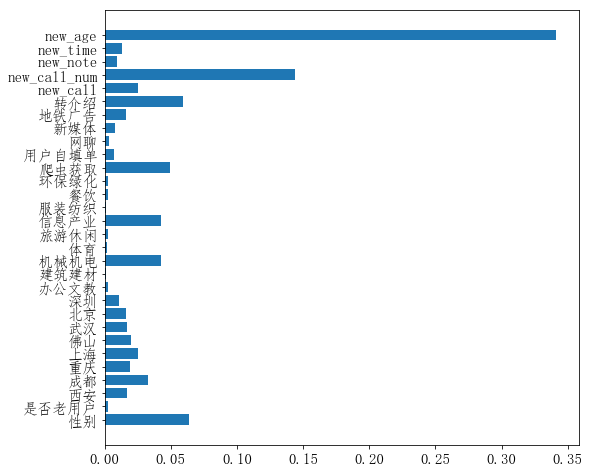

In [25]:
plt.figure(figsize=(8.5,8))
plt.barh(train_test_data.keys(),model.feature_importances_)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

In [26]:
accv=[]
acct=[]
for name,model in model_list.items():
    model.fit(train_data,train_label)
    y_predict = model.predict(test_data)
    y_train = model.predict(train_data)
    v = acc(y_predict,test_label)
    t = acc(y_train,train_label)
    print(name,':',v,t)
    accv.append(v)
    acct.append(t)

C:\Programs\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LR : 0.8218 0.8283
GBDT : 0.7982 0.800425
RF : 0.829 0.8382
AdaBoost : 0.7982 0.800425
Bagging : 0.8806 0.999325
ExtraTrees : 0.8024 0.80595


C:\Programs\Anaconda\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Programs\Anaconda\lib\site-packages\sklearn\svm\base.py:244: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


SVM : 0.6245 0.62555


Text(0, 0.5, '准确率')

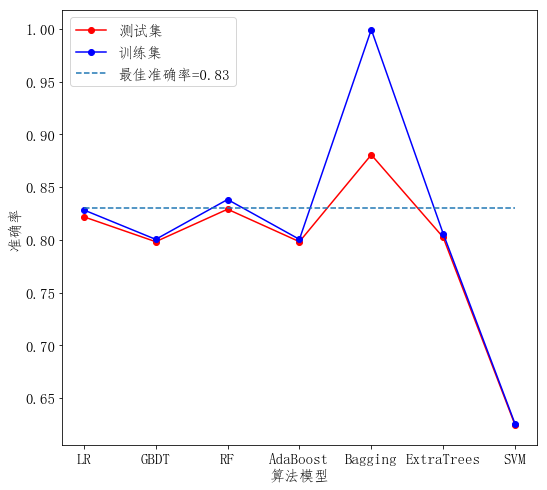

In [27]:
plt.figure(figsize=(8.5, 8))
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.plot(model_list.keys(),accv,'ro-', label = '测试集')
plt.plot(model_list.keys(),acct,'bo-', label = '训练集')
plt.plot(model_list.keys(),[0.83 for i in range(len(accv))],'--',label='最佳准确率=0.83')
plt.legend(fontsize=15)
plt.xlabel('算法模型',fontsize=15)
plt.ylabel('准确率',fontsize=15)

### 尝试神经网络

In [28]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.optim.lr_scheduler import ReduceLROnPlateau

In [29]:
class classifier_dropout(nn.Module):
    def __init__(self):
        super(classifier_dropout,self).__init__()
        self.linear1 = nn.Linear(30,512)
        self.bn1 = nn.Dropout(0.5)
        self.relu1 = nn.ReLU(inplace=True)
        self.linear2 = nn.Linear(512,256)
        self.bn2 = nn.Dropout(0.5)
        self.relu2 = nn.ReLU(inplace=True)
        self.linear3 = nn.Linear(256,128)
        self.bn3 = nn.Dropout(0.5)
        self.relu3 = nn.ReLU(inplace=True)
        self.linear4 = nn.Linear(896,1)
    def forward(self,x):
        x = self.linear1(x)
        x = self.bn1(x)
        x1 = self.relu1(x)
        x2 = self.linear2(x1)
        x2 = self.bn2(x2)
        x2 = self.relu2(x2)
        x3 = self.linear3(x2)
        x3 = self.bn3(x3)
        x3 = self.relu3(x3)
        x3 = torch.cat((x1,x2,x3),1)
        x3 = self.linear4(x3)
        return x3

In [30]:
class classifier(nn.Module):
    def __init__(self):
        super(classifier,self).__init__()
        self.linear1 = nn.Linear(30,512)
        self.relu1 = nn.ReLU(inplace=True)
        self.linear2 = nn.Linear(512,256)
        self.relu2 = nn.ReLU(inplace=True)
        self.linear3 = nn.Linear(256,128)
        self.relu3 = nn.ReLU(inplace=True)
        self.linear4 = nn.Linear(896,1)
    def forward(self,x):
        x = self.linear1(x)
        x1 = self.relu1(x)
        x2 = self.linear2(x1)
        x2 = self.relu2(x2)
        x3 = self.linear3(x2)
        x3 = self.relu3(x3)
        x3 = torch.cat((x1,x2,x3),1)
        x3 = self.linear4(x3)
        return x3

In [31]:
class classifier_simple(nn.Module):
    def __init__(self):
        super(classifier_simple,self).__init__()
        self.linear1 = nn.Linear(30,512)
        self.relu1 = nn.ReLU(inplace=True)
        self.linear2 = nn.Linear(512,256)
        self.relu2 = nn.ReLU(inplace=True)
        self.linear3 = nn.Linear(256,128)
        self.relu3 = nn.ReLU(inplace=True)
        self.linear4 = nn.Linear(128,1)
    def forward(self,x):
        x = self.linear1(x)
        x1 = self.relu1(x)
        x2 = self.linear2(x1)
        x2 = self.relu2(x2)
        x3 = self.linear3(x2)
        x3 = self.relu3(x3)
        x3 = self.linear4(x3)
        return x3

1/20 : 0.7982 0.800425
2/20 : 0.7982 0.800425
3/20 : 0.7982 0.800425
4/20 : 0.7982 0.80045
5/20 : 0.7988 0.800975
6/20 : 0.7996 0.8036
7/20 : 0.7934 0.7977
8/20 : 0.8149 0.819675
9/20 : 0.5887 0.57795
10/20 : 0.7982 0.800425
11/20 : 0.7982 0.800425
12/20 : 0.7482 0.75045
13/20 : 0.793 0.795125
14/20 : 0.7969 0.798625
15/20 : 0.7967 0.7998
16/20 : 0.4776 0.477825
17/20 : 0.7982 0.800425
18/20 : 0.7073 0.711525
19/20 : 0.6447 0.6486
20/20 : 0.7982 0.80035
21/20 : 0.7982 0.800375
22/20 : 0.6383 0.637425
23/20 : 0.7981 0.8003
24/20 : 0.7982 0.800375
25/20 : 0.7532 0.754125
26/20 : 0.7583 0.7627
27/20 : 0.7918 0.792575
28/20 : 0.7982 0.800425
29/20 : 0.7982 0.8004
30/20 : 0.8166 0.817325
31/20 : 0.7812 0.782525
32/20 : 0.8011 0.80355
33/20 : 0.7966 0.79875
34/20 : 0.816 0.8202
35/20 : 0.7944 0.79625
36/20 : 0.7981 0.800425
37/20 : 0.7912 0.7931
38/20 : 0.7982 0.800475
39/20 : 0.7971 0.80655
40/20 : 0.7968 0.8026
41/20 : 0.793 0.79765
42/20 : 0.7793 0.78095
Epoch    41: reducing learning rat

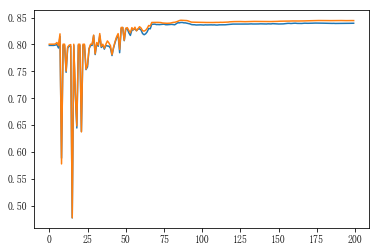

In [32]:
from tensorboardX import SummaryWriter
writer = SummaryWriter()
model = classifier()

optimizer = torch.optim.SGD(model.parameters(),lr=0.0001)
scheduler = ReduceLROnPlateau(optimizer, mode= 'min',verbose = True,patience = 25)
acc_train = []
accu_val = []
x = torch.from_numpy(np.array(train_data,dtype = 'float32'))
y_true = torch.from_numpy(np.array(train_label.reshape(-1,1),dtype = 'float32'))
test_true = np.array(test_label.reshape(-1,1),dtype = 'float32')
train_true = np.array(train_label.reshape(-1,1),dtype = 'float32')
for i in range(200):
    model.train()
    y_pred = model(x)
    loss = F.binary_cross_entropy_with_logits(y_pred,y_true,reduction='sum')
    loss.backward()
    optimizer.step()
    model.eval()
    output = torch.sigmoid(model(torch.from_numpy(np.array(test_data,dtype = 'float32'))))
    predict = np.array(list(map(lambda x: 1 if x>0.5 else 0,output.data.numpy().ravel()))).reshape(-1,1)
    v = acc(predict,test_true)
    accu_val.append(v)
    train_output = torch.sigmoid(model(x))
    train_predict = np.array(list(map(lambda x: 1 if x>0.5 else 0,train_output.data.numpy()))).reshape(-1,1)
    t = acc(train_predict,train_true)
    acc_train.append(t)
    writer.add_scalar('Train_loss',loss,i)
    writer.add_scalar('Train_accuracy',t,i)
    writer.add_scalar('Test_accuracy',v,i)
    if sum(accu_val[-1]>=np.array(accu_val))==len(accu_val):
        torch.save(model.state_dict(),'{}.pt'.format(str(v)))
    if sum(accu_val[-1]==np.array(accu_val[-15:]))==15 and len(accu_val)>10:
        print('early stop')
        break
    print(str(i+1)+'/'+'20',':',v,t)
    scheduler.step(v)
writer.add_graph(model,(x,))
plt.plot(accu_val)
plt.plot(acc_train)
writer.close()

1/20 : 0.7982 0.800425
2/20 : 0.7982 0.800425
3/20 : 0.7982 0.800425
4/20 : 0.7982 0.800425
5/20 : 0.7985 0.80105
6/20 : 0.7981 0.801675
7/20 : 0.7986 0.80435
8/20 : 0.8039 0.813725
9/20 : 0.7983 0.800425
10/20 : 0.8035 0.8076
11/20 : 0.8083 0.815575
12/20 : 0.7988 0.801
13/20 : 0.8042 0.808975
14/20 : 0.7946 0.798175
15/20 : 0.8087 0.811325
16/20 : 0.8056 0.807325
17/20 : 0.83 0.833425
18/20 : 0.8367 0.840625
19/20 : 0.8264 0.827625
20/20 : 0.8284 0.83195
21/20 : 0.8378 0.84395
22/20 : 0.8413 0.846625
23/20 : 0.8286 0.831825
24/20 : 0.8349 0.83835
25/20 : 0.8449 0.847475
26/20 : 0.8417 0.8459
27/20 : 0.8327 0.8358
28/20 : 0.8286 0.830825
29/20 : 0.8375 0.842175
30/20 : 0.8429 0.845975
31/20 : 0.8386 0.8426
32/20 : 0.8356 0.839375
33/20 : 0.8383 0.84125
34/20 : 0.8406 0.8455
35/20 : 0.8404 0.844725
36/20 : 0.8365 0.838825
37/20 : 0.8379 0.8411
38/20 : 0.8478 0.853225
39/20 : 0.8484 0.8539
40/20 : 0.8432 0.849675
Epoch    39: reducing learning rate of group 0 to 1.0000e-05.
41/20 : 0.84

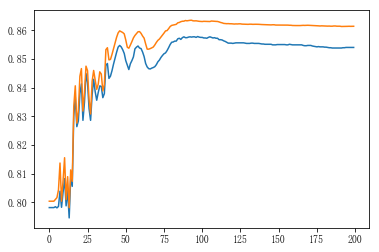

In [33]:
model = classifier_dropout()

optimizer = torch.optim.SGD(model.parameters(),lr=0.0001)
scheduler = ReduceLROnPlateau(optimizer, mode= 'min',verbose = True,patience = 25)
acc_train_dropout = []
accu_val_dropout = []
x = torch.from_numpy(np.array(train_data,dtype = 'float32'))
y_true = torch.from_numpy(np.array(train_label.reshape(-1,1),dtype = 'float32'))
test_true = np.array(test_label.reshape(-1,1),dtype = 'float32')
train_true = np.array(train_label.reshape(-1,1),dtype = 'float32')
for i in range(200):
    model.train()
    y_pred = model(x)
    loss = F.binary_cross_entropy_with_logits(y_pred,y_true,reduction='sum')
    loss.backward()
    optimizer.step()
    model.eval()
    output = torch.sigmoid(model(torch.from_numpy(np.array(test_data,dtype = 'float32'))))
    predict = np.array(list(map(lambda x: 1 if x>0.5 else 0,output.data.numpy().ravel()))).reshape(-1,1)
    v = acc(predict,test_true)
    accu_val_dropout.append(v)
    train_output = torch.sigmoid(model(x))
    train_predict = np.array(list(map(lambda x: 1 if x>0.5 else 0,train_output.data.numpy()))).reshape(-1,1)
    t = acc(train_predict,train_true)
    acc_train_dropout.append(t)
    if sum(accu_val_dropout[-1]>=np.array(accu_val_dropout))==len(accu_val_dropout):
        torch.save(model.state_dict(),'{}.pt'.format(str(v)))
    if sum(accu_val_dropout[-1]==np.array(accu_val_dropout[-15:]))==15 and len(accu_val_dropout)>10:
        print('early stop')
        break
    print(str(i+1)+'/'+'20',':',v,t)
    scheduler.step(v)
plt.plot(accu_val_dropout)
plt.plot(acc_train_dropout)

1/20 : 0.7982 0.800425
2/20 : 0.7982 0.800425
3/20 : 0.2018 0.199575
4/20 : 0.7982 0.800425
5/20 : 0.2018 0.199575
6/20 : 0.7982 0.800425
7/20 : 0.2018 0.199575


C:\Programs\Anaconda\lib\site-packages\ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in greater
C:\Programs\Anaconda\lib\site-packages\ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in greater


8/20 : 0.7982 0.800425
9/20 : 0.7982 0.800425
10/20 : 0.7982 0.800425
11/20 : 0.7982 0.800425
12/20 : 0.7982 0.800425
13/20 : 0.7982 0.800425
14/20 : 0.7982 0.800425
15/20 : 0.7982 0.800425
16/20 : 0.7982 0.800425
17/20 : 0.7982 0.800425
18/20 : 0.7982 0.800425
19/20 : 0.7982 0.800425
20/20 : 0.7982 0.800425
21/20 : 0.7982 0.800425
early stop


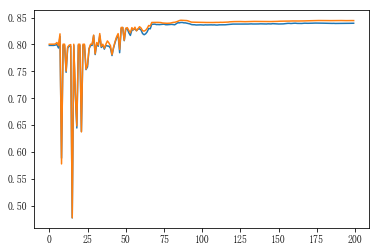

In [34]:
model = classifier_simple()

optimizer = torch.optim.SGD(model.parameters(),lr=0.001,weight_decay=1e-3)
scheduler = ReduceLROnPlateau(optimizer, mode= 'min',verbose = True,patience = 25)
acc_train_simple = []
accu_val_simple = []
x = torch.from_numpy(np.array(train_data,dtype = 'float32'))
y_true = torch.from_numpy(np.array(train_label.reshape(-1,1),dtype = 'float32'))
test_true = np.array(test_label.reshape(-1,1),dtype = 'float32')
train_true = np.array(train_label.reshape(-1,1),dtype = 'float32')
for i in range(200):
    model.train()
    y_pred = model(x)
    loss = F.binary_cross_entropy_with_logits(y_pred,y_true,reduction='sum')
    loss.backward()
    optimizer.step()
    model.eval()
    output = torch.sigmoid(model(torch.from_numpy(np.array(test_data,dtype = 'float32'))))
    predict = np.array(list(map(lambda x: 1 if x>0.5 else 0,output.data.numpy().ravel()))).reshape(-1,1)
    v = acc(predict,test_true)
    accu_val_simple.append(v)
    train_output = torch.sigmoid(model(x))
    train_predict = np.array(list(map(lambda x: 1 if x>0.5 else 0,train_output.data.numpy()))).reshape(-1,1)
    t = acc(train_predict,train_true)
    acc_train_simple.append(t)
    if sum(accu_val_simple[-1]>=np.array(accu_val_simple))==len(accu_val_simple):
        torch.save(model.state_dict(),'{}.pt'.format(str(v)))
    if sum(accu_val_simple[-1]==np.array(accu_val_simple[-15:]))==15 and len(accu_val_simple)>15:
        print('early stop')
        break
    print(str(i+1)+'/'+'20',':',v,t)
    scheduler.step(v)
plt.plot(accu_val)
plt.plot(acc_train)

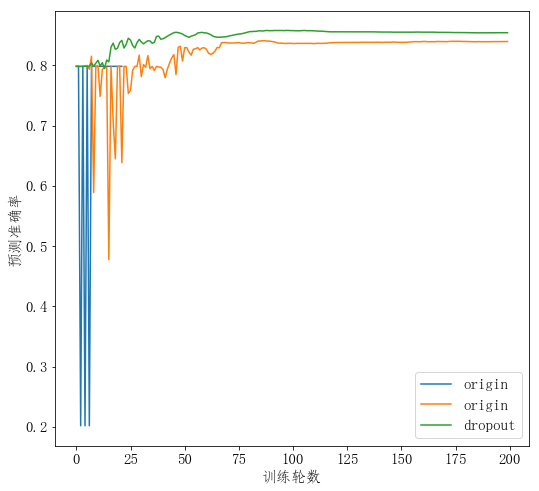

In [35]:
plt.figure(figsize=(8.5, 8))
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.plot(accu_val_simple,label = 'origin')
plt.plot(accu_val,label = 'origin')
plt.plot(accu_val_dropout,label = 'dropout')
plt.xlabel('训练轮数',fontsize=15)
plt.ylabel('预测准确率',fontsize=15)
plt.legend(fontsize=15)

In [37]:
for s in score:
    accv.append(s)
for t in [acc_train_simple[-1],acc_train[-1],acc_train_dropout[-1]]:
    acct.append(t)

Text(0, 0.5, '准确率')

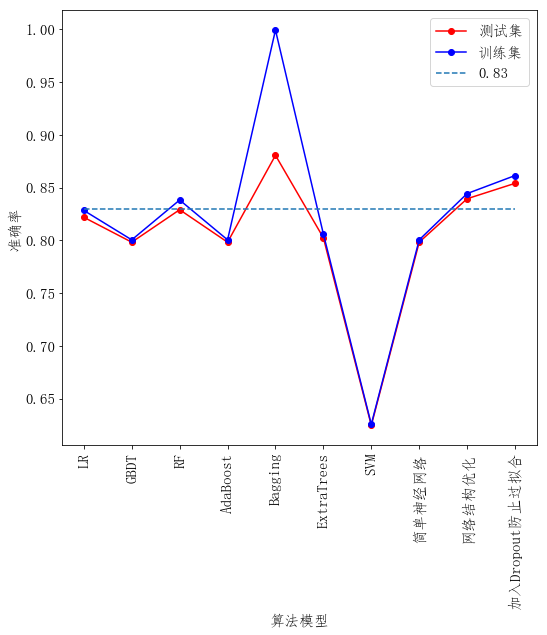

In [38]:
plt.figure(figsize=(8.5, 8))
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
name = []
for k in model_list.keys():
    name.append(k)
for k in label:
    name.append(k)
plt.plot(name,accv,'ro-', label = '测试集')
plt.plot(name,acct,'bo-', label = '训练集')
plt.plot(name,[0.83 for i in range(len(accv))],'--',label='0.83')
plt.legend(fontsize=15)
plt.xticks(rotation='vertical')
plt.xlabel('算法模型',fontsize=15)
plt.ylabel('准确率',fontsize=15)

# 采用协调过滤算法（CF）
协同过滤的主要思想是通过计算**相似度**来进行预测，分为**基于物品的协同过滤**和**基于用户的协同过滤**

相似度一般有3种计算方式：
1. cosine相似度:$$simularity(A,B)=\frac{A*B}{|A|*|B|}$$
2. Jaccard相似度: $$simularity(A,B)=\frac{|A\cap{B}|}{|A\cup{B}|}$$
3. 皮尔逊相似度: $$simularity(A,B)=\frac{\sum{(A-\bar{A})*\sum{(B-\bar{B})}}}{\sqrt{\sum(A-\bar{A})^{2}*\sum(B-\bar{B})^{2}}}$$

为了计算方便，一般采用***cosine***相似度

在实施协同过滤算法时，有两种实施方法，一种是**基于物品的协同过滤**一种是**基于用户的协同过滤**
1. **基于物品的cf**根据用户的个人喜好来推荐相似产品，倾向于相关性，解释性强
2. **基于用户的cf**根据不同用户的相似性，通过相似用户的喜好来进行推荐，倾向于新颖性，解释性弱

在本项目中，可以将商机视为商品，将商务视为客户，然后采用**基于商品的协同过滤**，给一个商务匹配与其成功成单数据相似度最高的商机，以提高成单率，优化商机分配

协同过滤算法优缺点：
1. 优点: 原理简单，方便实施，有一定的准确率
2. 缺点: 简单的矩阵计算无法处理大规模高维度数据，可通过矩阵分解来进行优化

In [47]:
name.append('协同过滤')

In [39]:
x_train = np.array(train_data)
x_test = np.array(test_data)
y_train = np.array(train_label)
y_test = np.array(test_label)

In [40]:
# 按cosine相似度进行匹配
# 将数据库中与待预测数据相似度最高的那一组数据作为预测值
def cf_cosine(x,data_x,data_y):
    predict = np.dot(x,data_x.T)/np.dot(np.linalg.norm(x,ord=2,axis=1).reshape(-1,1),np.linalg.norm(data_x,ord=2,axis=1).reshape(1,-1))
    idex =  np.argmax(np.abs(predict),axis = 1)
    return data_y[idex]
    

In [41]:
start = time.time()
predict = cf_cosine(x_test,x_train,y_train)
print(time.time()-start)

58.164220094680786


In [46]:
accv.append(metrics.accuracy_score(y_test,predict))

In [52]:
metrics.accuracy_score(y_test,predict)

0.7903

Text(0, 0.5, '准确率')

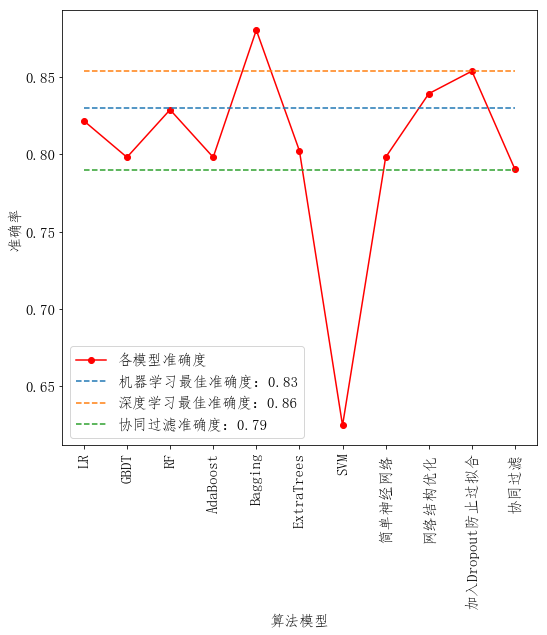

In [55]:
plt.figure(figsize=(8.5, 8))
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.plot(name,accv,'ro-', label = '各模型准确度')
plt.plot(name,[0.83 for i in range(len(accv))],'--',label='机器学习最佳准确度：0.83')
plt.plot(name,[0.854 for i in range(len(accv))],'--',label='深度学习最佳准确度：0.86')
plt.plot(name,[0.79 for i in range(len(accv))],'--',label='协同过滤准确度：0.79')
plt.legend(fontsize=15)
plt.xticks(rotation='vertical')
plt.xlabel('算法模型',fontsize=15)
plt.ylabel('准确率',fontsize=15)

In [2]:
import sklearn
from sklearn.metrics.pairwise import cosine_similarity

In [3]:
cosine_similar